<a href="https://colab.research.google.com/github/KS0999/ML/blob/main/Classfitication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import torch

In [2]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=1000,
                   noise = 0.05,
                   random_state=1)

In [3]:
print(f"X features:\n{X[:5]}")
print(f"\ny features:\n{y[:5]}")

X features:
[[ 0.86239218  0.01253183]
 [-0.53415021 -0.67892392]
 [ 0.87409295 -0.64109708]
 [-0.09501098 -0.94448442]
 [-1.00607172  0.17386973]]

y features:
[1 1 0 0 0]


In [4]:
print(f"X's shape is ...{X.shape}")
print(f"y's shape is ...{y.shape}")

X's shape is ...(1000, 2)
y's shape is ...(1000,)


In [5]:
circles= pd.DataFrame({"X1":X[:,0],
                       "X2":X[:,1],
                       "label":y})
circles

,X1,X2,label
0,0.862392,0.012532,1
1,-0.534150,-0.678924,1
2,0.874093,-0.641097,0
3,-0.095011,-0.944484,0
4,-1.006072,0.173870,0
...,...,...,...
995,-0.723685,-0.238148,1
996,0.663198,0.793716,0
997,0.314766,-0.681608,1
998,-0.955325,0.127157,0


In [6]:
type(circles)

pandas.core.frame.DataFrame

In [7]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

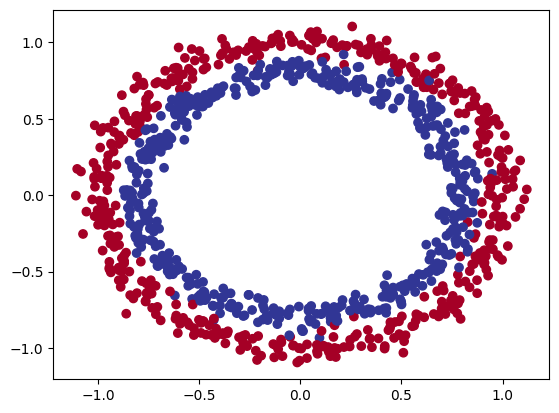

In [8]:
plt.scatter(x=X[:,0],

            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [9]:
#before get into model make sure turn type of ur data

X=torch.from_numpy(X).type(torch.float32)
y=torch.from_numpy(y).type(torch.float32)

X[:5],y[:5]

(tensor([[ 0.8624,  0.0125],
         [-0.5342, -0.6789],
         [ 0.8741, -0.6411],
         [-0.0950, -0.9445],
         [-1.0061,  0.1739]]),
 tensor([1., 1., 0., 0., 0.]))

In [10]:
print(f"X's type{type(X)},y's type{type(y)}")

X's type<class 'torch.Tensor'>,y's type<class 'torch.Tensor'>


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8, # 80%>> for "TRAIN!"
                                                    test_size=0.2, # same concept as train_size
                                                    random_state=1)


In [12]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

setting....

1.setup agonistic code to "cuda"
2. model(`nn.module`)
3. define loss & optimize
4. loop( train & test )


In [13]:
import torch
from torch import nn

device = "cuda"if torch.cuda.is_available() else "cpu"
device

'cuda'

In [14]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=8)
    self.layer2=nn.Linear(in_features=8,out_features=1)
  def forward(self,x):
    return self.layer1(self.layer2(x))

self.layer1=nn.Linear(in_features=2,out_features=8)


self.layer2=nn.Linear(in_features=8,out_features=2)

可以利用nn.sequentail做到相同的事↓

In [15]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.model_1=nn.Sequential(
        nn.Linear(in_features=2,out_features=5),
        nn.Linear(in_features=5,out_features=1)
      )
  def forward(self,x):
    return self.model_1(x)


In [16]:
model_1=CircleModel().to(device)
model_1

CircleModel(
  (model_1): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [17]:
model_1.state_dict()

OrderedDict([('model_1.0.weight',
              tensor([[ 0.1425,  0.0945],
                      [ 0.2481, -0.4926],
                      [ 0.0603, -0.3005],
                      [ 0.5440,  0.4896],
                      [-0.0951, -0.6579]], device='cuda:0')),
             ('model_1.0.bias',
              tensor([-0.2893,  0.6339, -0.2459, -0.5901,  0.4063], device='cuda:0')),
             ('model_1.1.weight',
              tensor([[ 0.2940, -0.1018,  0.4310, -0.2435, -0.2463]], device='cuda:0')),
             ('model_1.1.bias', tensor([0.4017], device='cuda:0'))])

In [18]:
#define loss function>>use"BCEWithLogitsloss" just becasuse better than "BCELoss"
loss_fn=nn.BCEWithLogitsLoss()
#define optimizer
optimizer = torch.optim.SGD(params=CircleModel().parameters(),
                            lr=0.001)

In [19]:
#calculate accuracy
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

**ALL THE STEP**

**1.  raw logit  >>  2.  predition probability  >>  3.  prediction labels**

prediction label
raw logit to prediction probability by using activation function,EX: sigmoid ,ReLu etc...


In [20]:
model_1.eval()
# y_logit now is raw logit
with torch.inference_mode():
  y_logit=model_1(X_test.to(device))
y_logit[:5]

tensor([[0.2401],
        [0.1741],
        [0.2165],
        [0.1633],
        [0.2351]], device='cuda:0')

In [21]:
y_test[:5]

tensor([1., 1., 1., 0., 0.])

In [22]:
print(f"y_logit's shape:{y_logit.shape},y_test's shape:{y_test.shape}")

y_logit's shape:torch.Size([200, 1]),y_test's shape:torch.Size([200])


as u can see they aren't on same value ...

I　mean y_test's value is 0 or 1. but y_logit is float

they aren't match!! so we have to turn convert the value(y_logit)

diving into step 2:

**raw logit into prediction probablity**

In [23]:
y_pred_pro=torch.sigmoid(y_logit)  # "sigmoid" just a one of activation function
y_pred_pro[:5] # now we haven't done yet.( p.s. y_test is 0 and 1.)

tensor([[0.5597],
        [0.5434],
        [0.5539],
        [0.5407],
        [0.5585]], device='cuda:0')

and I want to explain something about our loss function:

we're using `BCEWithLogitsloss` so if we trained module(Loop) in the step2 "Calculate the Loss"

y_logit=model_1(X_test.to(device))
loss = loss_fn(y_logit)

>> **BCEWithLogitsloss except a "raw logit" as input**

on the other hand, if we used `BCELoss` as our loss funcion
y_pred_pro=torch.sigmoid(y_logit)
loss = loss_fn(y_pred_pro)

>> **BCELoss except a "prediction probability" as input**

In [24]:
# final step is use the prediction probability to find prediction labels

y_pred_label=torch.round(y_pred_pro)
print(f"y_test's format :{y_test[:5]}\ny_pred_label's foramt :{y_pred_label[:5].squeeze()}")

y_test's format :tensor([1., 1., 1., 0., 0.])
y_pred_label's foramt :tensor([1., 1., 1., 1., 1.], device='cuda:0')


Train Loop:

1.forward pass

2.calculate the loss

3.optimizer zero grad

4.Loss backword

5.optimizer step

In [25]:
y_test.shape

torch.Size([200])

In [26]:
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

print(f"X_train's shape is :{X_train.shape}, X_test's shape is :{X_test.shape}")
print(f"y_train's shape is :{y_train.shape} \t, y_test's shape is :{y_test.shape}")

X_train's shape is :torch.Size([800, 2]), X_test's shape is :torch.Size([200, 2])
y_train's shape is :torch.Size([800]) 	, y_test's shape is :torch.Size([200])


In [27]:
torch.manual_seed(1)

epochs = 200

for epoch in range(epochs):
  model_1.train()
# 1. do the forward pass
  y_logit=model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logit))

# 2.calculate the loss & accuracy score
  loss=loss_fn(y_logit,y_train)
  acc=accuracy_fn(y_train,y_pred) #accuracy_fn(y_true,y_pred)

# 3.optimizer zero grad
  optimizer.zero_grad()

# 4.loss backward
  loss.backward()

# 5.optimizer step
  optimizer.step()

  model_1.eval()
  # do the forward pass
  with torch.inference_mode():
    test_logit= model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logit))
  # loss & accuracy
    test_loss=loss_fn(test_logit,y_test)
    test_acc=accuracy_fn(y_test,test_pred)
  if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69822, Accuracy: 49.62% | Test loss: 0.69597, Test acc: 51.50%
Epoch: 10 | Loss: 0.69822, Accuracy: 49.62% | Test loss: 0.69597, Test acc: 51.50%
Epoch: 20 | Loss: 0.69822, Accuracy: 49.62% | Test loss: 0.69597, Test acc: 51.50%
Epoch: 30 | Loss: 0.69822, Accuracy: 49.62% | Test loss: 0.69597, Test acc: 51.50%
Epoch: 40 | Loss: 0.69822, Accuracy: 49.62% | Test loss: 0.69597, Test acc: 51.50%
Epoch: 50 | Loss: 0.69822, Accuracy: 49.62% | Test loss: 0.69597, Test acc: 51.50%
Epoch: 60 | Loss: 0.69822, Accuracy: 49.62% | Test loss: 0.69597, Test acc: 51.50%
Epoch: 70 | Loss: 0.69822, Accuracy: 49.62% | Test loss: 0.69597, Test acc: 51.50%
Epoch: 80 | Loss: 0.69822, Accuracy: 49.62% | Test loss: 0.69597, Test acc: 51.50%
Epoch: 90 | Loss: 0.69822, Accuracy: 49.62% | Test loss: 0.69597, Test acc: 51.50%
Epoch: 100 | Loss: 0.69822, Accuracy: 49.62% | Test loss: 0.69597, Test acc: 51.50%
Epoch: 110 | Loss: 0.69822, Accuracy: 49.62% | Test loss: 0.69597, Test acc: 51.50%
Epo

In [28]:
import requests
import pathlib as path
import matplotlib.pyplot as plt
import os

if os.path.isfile("helper_functions.py"):
  print("helper functions is exist!")
else:
  print("helper functions isn't exist! Preparing for downing...")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as file:
    file.write(request.content)

helper functions isn't exist! Preparing for downing...


In [29]:
import numpy as np
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [30]:
def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    """
  Plots linear training data and test data and compares predictions.
  """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

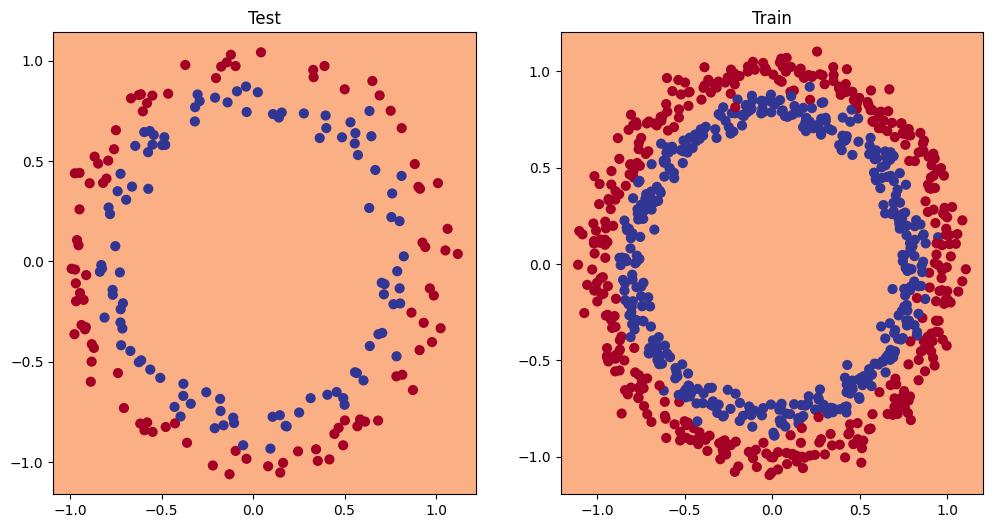

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)
plt.subplot(1,2,2)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)

In [32]:
class CircleModel_1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=10)
    self.layer2=nn.Linear(in_features=10,out_features=10)
    self.layer3=nn.Linear(in_features=10,out_features=1)
  def forward(self,x):
    return torch.sigmoid(self.layer3(self.layer2(self.layer1(x))))

In [33]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [34]:
model_2=CircleModel_1().to(device)
model_2

CircleModel_1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [35]:
optimizer = torch.optim.Adam(lr=0.01,
                             params=CircleModel_1().parameters())
loss_fn = nn.BCEWithLogitsLoss()

In [36]:

y_logit.shape

torch.Size([800])

In [37]:
X_test,y_test=X_test.to(device),y_test.to(device)
X_train,y_train=X_train.to(device),y_train.to(device)

print(f"X_test shape {X_test.shape},X_train shape {X_train.shape}")
print(f"y_test shape {y_test.shape},y_train shape {y_train.shape}")
print(f"X_test {X_test.device},X_train {X_train.device}")
print(f"y_test {y_test.device},y_train {y_train.device}")

X_test shape torch.Size([200, 2]),X_train shape torch.Size([800, 2])
y_test shape torch.Size([200]),y_train shape torch.Size([800])
X_test cuda:0,X_train cuda:0
y_test cuda:0,y_train cuda:0


In [38]:
test_logit = model_2(X_test).squeeze()
y_logit=model_2(X_train).squeeze()

print(f"y_logit's shape {y_logit.shape}\ntest_logit's shape {test_logit.shape} ")

y_logit's shape torch.Size([800])
test_logit's shape torch.Size([200]) 


In [39]:
y_train.shape

torch.Size([800])

In [40]:
epochs = 1000


for epoch in range(epochs):
  model_2.train()
  # do the forward pass
  y_logit=model_2(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logit))

  # calculate the loss
  loss = loss_fn(y_logit,y_train)
  acc = accuracy_fn(y_true=y_train,y_pred=y_pred)
  # optimizer zero grad
  optimizer.zero_grad()

  # loss backward
  loss.backward()

  # optimize step
  optimizer.step()

  model_2.eval()
  # do the forward pass
  with torch.inference_mode():
    test_logit= model_2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logit))
  # loss & accuracy
    test_loss=loss_fn(test_logit,y_test)
    test_acc=accuracy_fn(y_test,test_pred)
  if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.72243, Accuracy: 49.62% | Test loss: 0.71384, Test acc: 51.50%
Epoch: 100 | Loss: 0.72243, Accuracy: 49.62% | Test loss: 0.71384, Test acc: 51.50%
Epoch: 200 | Loss: 0.72243, Accuracy: 49.62% | Test loss: 0.71384, Test acc: 51.50%
Epoch: 300 | Loss: 0.72243, Accuracy: 49.62% | Test loss: 0.71384, Test acc: 51.50%
Epoch: 400 | Loss: 0.72243, Accuracy: 49.62% | Test loss: 0.71384, Test acc: 51.50%
Epoch: 500 | Loss: 0.72243, Accuracy: 49.62% | Test loss: 0.71384, Test acc: 51.50%
Epoch: 600 | Loss: 0.72243, Accuracy: 49.62% | Test loss: 0.71384, Test acc: 51.50%
Epoch: 700 | Loss: 0.72243, Accuracy: 49.62% | Test loss: 0.71384, Test acc: 51.50%
Epoch: 800 | Loss: 0.72243, Accuracy: 49.62% | Test loss: 0.71384, Test acc: 51.50%
Epoch: 900 | Loss: 0.72243, Accuracy: 49.62% | Test loss: 0.71384, Test acc: 51.50%
